<a href="https://colab.research.google.com/github/ANAGHA-R-NAIR/ANAGHA-R-NAIR/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to be working with the data created by:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
It is available on Kaggle as Heart.csv, https://www.kaggle.com/datasets/zhaoyingzhu/heartcsv.


The main problem statement here is to predict the presence of absence of heart disease in a person, based on various medical reports, once they are admitted to the hospital.

1. **Loading data**

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving cvd-healthcare-data.csv to cvd-healthcare-data.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("cvd-healthcare-data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now that we have loaded the data as df, we will try to understand the data.

In the above data:
* age: Person's age in years (Integer)
* sex : Person's sex, where 1 = male and 0 = female (Boolean)
*   cp : Type of chest pain experienced(Integer)
- Value 0: asymptomatic
-  Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina
*   trestbps : Person's resting blood pressure at time of admission to hospital (Integer)
*   chol	:	Cholestrol level of the person (Integer)
*   fbs : Person's fasting blood sugar in terms of whether high(1) or low(0) (Boolean)
*   restecg : Resting electrocardiographic measurement (Integer)
- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   thalach : Person's maximum heart rate achieved (Integer)
*   exang	: Exercise induced angina, in terms of present(1) or absent(0) (Boolean)
* oldpeak : ST segment of ECG experiences depression induced by exercise relative to rest (Float)
* slope	:Slope of the peak exercise ST segment (Integer)
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
* ca	: Number of major vessel (Integer)
* thal	: Thalasemmia (Integer)
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target : Presence or absence of heart disease (Boolean)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So, we see that none of the data is empty.

In order to better understand, the data, we can convert a few of the available data into Boolean form.

We can convert the data corresponding to Cholestrol to Boolean based on whether the patient's cholestrol level is normal.
The normal cholestrol level is <200 mg/dl. If normal, it returns 0, else, 1.

In [5]:
df.loc[df.chol < 200, 'chol'] = 0 #if cholestrol level is normal return 0
df.loc[df.chol >= 200, 'chol'] = 1# else return 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,0,1,163,1,0.6,2,0,2,1


The data corresponding to resting blood pressure can be simliarly converted to Boolean. The normal level is 120/80 mm Hg. Since, the minimum value is 94, we only need to consider high blood pressure. So, >120mm Hg can return 1 while <=120, returns 0.

In [6]:
df.loc[df.trestbps <= 120, 'trestbps'] = 0 #if resting blood pressure is normal return 0
df.loc[df.trestbps > 120, 'trestbps'] = 1# else return 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,1,1,1,0,150,0,2.3,0,0,1,1
1,37,1,2,1,1,0,1,187,0,3.5,0,0,2,1
2,41,0,1,1,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,0,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,0,1,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,0.679868,0.834983,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,0.467299,0.371809,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Next, we seperate the cp, restecg, slope and thal values into different columns.

In [8]:
#cp
df['cp_asymptomatic'] = [1 if i ==0 else 0 for i in df["cp"]]
df['cp_atypical_angina'] = [1 if i ==1 else 0 for i in df["cp"]]
df['cp_non_anginal_pain'] = [1 if i ==2 else 0 for i in df["cp"]]
df['cp_typical angina'] = [1 if i ==3 else 0 for i in df["cp"]]
df = df.drop("cp", axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical angina
0,63,1,1,1,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,1,1,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,1,1,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,0,1,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,0,1,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [9]:
#restecg
df['recg_lvh'] = [1 if i ==0 else 0 for i in df["restecg"]]
df["recg_normal"] = [1 if i ==1 else 0 for i in df["restecg"]]
df["recg_ST_abnormality"] = [1 if i ==2 else 0 for i in df["restecg"]]
df = df.drop("restecg", axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical angina,recg_lvh,recg_normal,recg_ST_abnormality
0,63,1,1,1,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,1,1,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,1,1,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,0,1,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,0,1,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0


In [10]:
#slope
df["slope_downsloping"] = [1 if i ==0 else 0 for i in df["slope"]]
df["slope_flat"] = [1 if i ==1 else 0 for i in df["slope"]]
df["slope_upsloping"] = [1 if i ==2 else 0 for i in df["slope"]]
df = df.drop("slope", axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_asymptomatic,cp_atypical_angina,cp_non_anginal_pain,cp_typical angina,recg_lvh,recg_normal,recg_ST_abnormality,slope_downsloping,slope_flat,slope_upsloping
0,63,1,1,1,1,150,0,2.3,0,1,...,0,0,0,1,1,0,0,1,0,0
1,37,1,1,1,0,187,0,3.5,0,2,...,0,0,1,0,0,1,0,1,0,0
2,41,0,1,1,0,172,0,1.4,0,2,...,0,1,0,0,1,0,0,0,0,1
3,56,1,0,1,0,178,0,0.8,0,2,...,0,1,0,0,0,1,0,0,0,1
4,57,0,0,1,0,163,1,0.6,0,2,...,1,0,0,0,0,1,0,0,0,1


In [11]:
#thal
df["thal_nothing"] = [1 if i ==0 else 0 for i in df["thal"]]
df["thal_fixed_defect"] = [1 if i ==1 else 0 for i in df["thal"]]
df["thal_normal"] = [1 if i ==2 else 0 for i in df["thal"]]
df["thal_reversable defect"] = [1 if i ==3 else 0 for i in df["thal"]]
df = df.drop("thal", axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,recg_lvh,recg_normal,recg_ST_abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_nothing,thal_fixed_defect,thal_normal,thal_reversable defect
0,63,1,1,1,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,1,1,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,1,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,0,1,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,0,1,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


Now, we seperate the df into two parts: Features X and target y.

In [12]:
X = df.drop("target", axis = 1)
y = df["target"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=42)

2. Feature Selection

Now, of these features, removing some of them won't affect the quality of the model, but rather increase the speed of the model.
In order to select the features to be removed, we use the ExtraTreesClassifier.

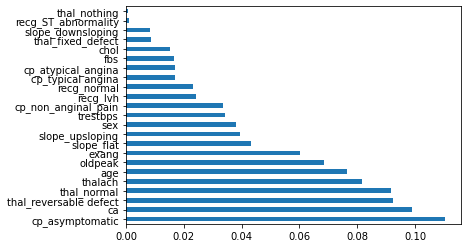

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [15]:
cols = [i for i in X.columns if i in feat_importances.nlargest(8)]
cols

['age',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'cp_asymptomatic',
 'thal_normal',
 'thal_reversable defect']

We are only choosing those features with feature importance atleast 0.05.

In [16]:
X_train = X_train[cols]
X_train.head()

,age,thalach,exang,oldpeak,ca,cp_asymptomatic,thal_normal,thal_reversable defect
132,42,162,0,0.0,0,0,1,0
202,58,111,1,0.8,0,1,0,1
196,46,147,0,3.6,0,0,1,0
75,55,161,0,1.4,0,0,1,0
176,60,160,1,1.4,2,1,0,1


In [17]:
X_test = X_test[cols]
X_test.head()

,age,thalach,exang,oldpeak,ca,cp_asymptomatic,thal_normal,thal_reversable defect
179,57,112,1,0.6,1,1,0,0
228,59,159,0,0.2,0,0,0,1
111,57,173,0,0.2,1,0,0,1
246,56,150,1,1.9,2,1,0,1
60,71,130,0,0.0,1,0,1,0


3. Modelling

In [21]:
from sklearn.linear_model import LogisticRegression #Importing the 6 machine learning algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

LR: 0.801183 (0.087806)
DTC: 0.719247 (0.107768)
KNN: 0.643011 (0.076117)
RFC: 0.804839 (0.059528)
NB: 0.831398 (0.045988)
SVC: 0.585914 (0.176729)


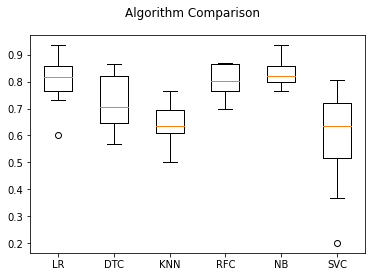

In [22]:
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('LR',  LogisticRegression(random_state=0, solver="liblinear")))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

4. Model Evaluation

From the above graph, it is clear that Gaussian NB and Random Forest Classifier are the best models for the given data set, as they all have nearly 80-83% accuracy with minimum standard deviation.